In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%cd "/content/drive/MyDrive/Cursos"
!ls

/content/drive/MyDrive/Cursos
dataset  modelo2.ipynb


#### Etiquetar las imagenes

In [28]:
data_directory = pathlib.Path('./dataset/train/')
class_names = [item.name for item in data_directory.glob('*')][:]
print(class_names)

['Audi', 'Mahindra Scorpio', 'Hyundai Creta', 'Swift', 'Toyota Innova', 'Rolls Royce', 'Tata Safari']


#### Cargar los datos

In [29]:
# Cargar los datos
data_gen = ImageDataGenerator(rescale=1./255,
                              horizontal_flip = False,
                              validation_split=0.2)

train_dir = "./dataset/train"
test_dir = "./dataset/test"

path = "/dataset"

train_data = data_gen.flow_from_directory("./dataset/train/", 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'sparse')
val_data = data_gen.flow_from_directory("./dataset/test/", 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'sparse')

Found 2684 images belonging to 7 classes.
Found 160 images belonging to 7 classes.


In [30]:
def plot_random_images(num):
    
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (15, 15))
    
    for image, label in zip(images, labels):
        plt.subplot(5, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == num+1:
            break

    plt.tight_layout()       
    plt.show()

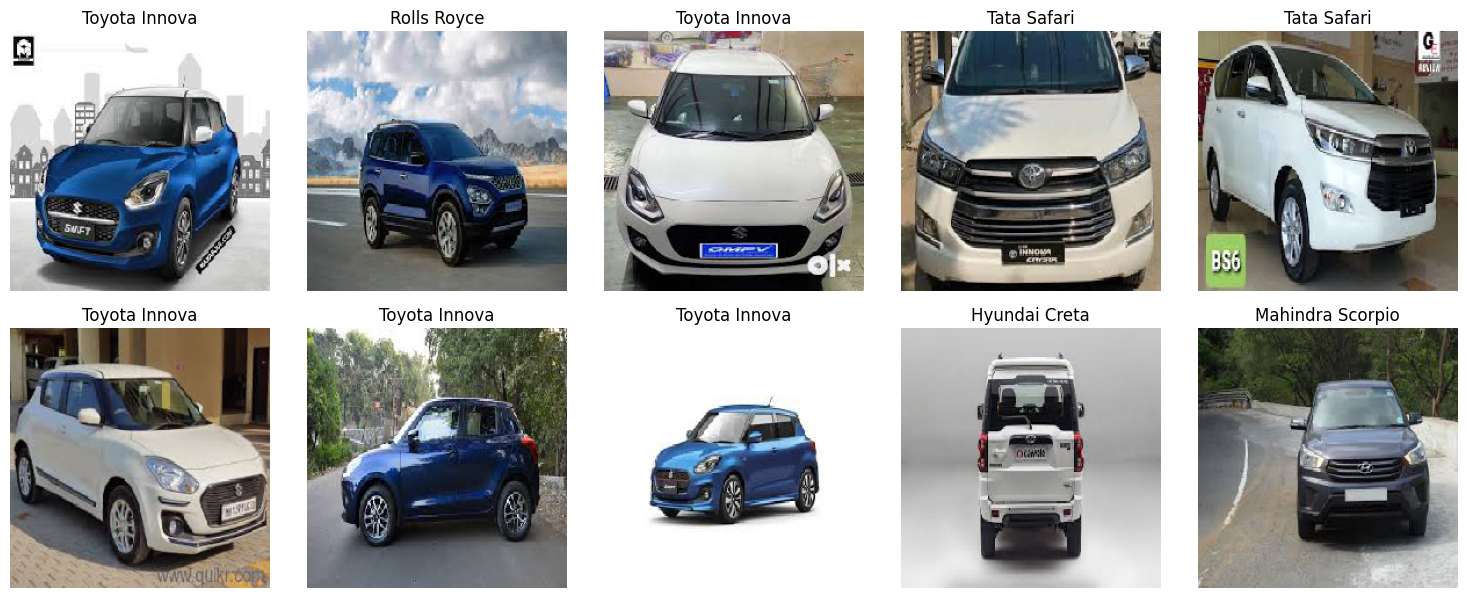

In [31]:
plot_random_images(10)

In [32]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                #    width_shift_range = 0.2,
                                #    height_shift_range = 0.2,
                                #    shear_range = 0.3,
								#    zoom_range = 0.3,
									horizontal_flip = True)



test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=10,
                                  horizontal_flip=True)

In [33]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (256, 256),
							batch_size = 1,
							class_mode ='binary')

test_generator = test_datagen.flow_from_directory(
							train_dir,
							target_size = (256, 256),
							batch_size = 1,
							class_mode ='binary')

Found 3352 images belonging to 7 classes.
Found 3352 images belonging to 7 classes.


<Figure size 640x480 with 0 Axes>

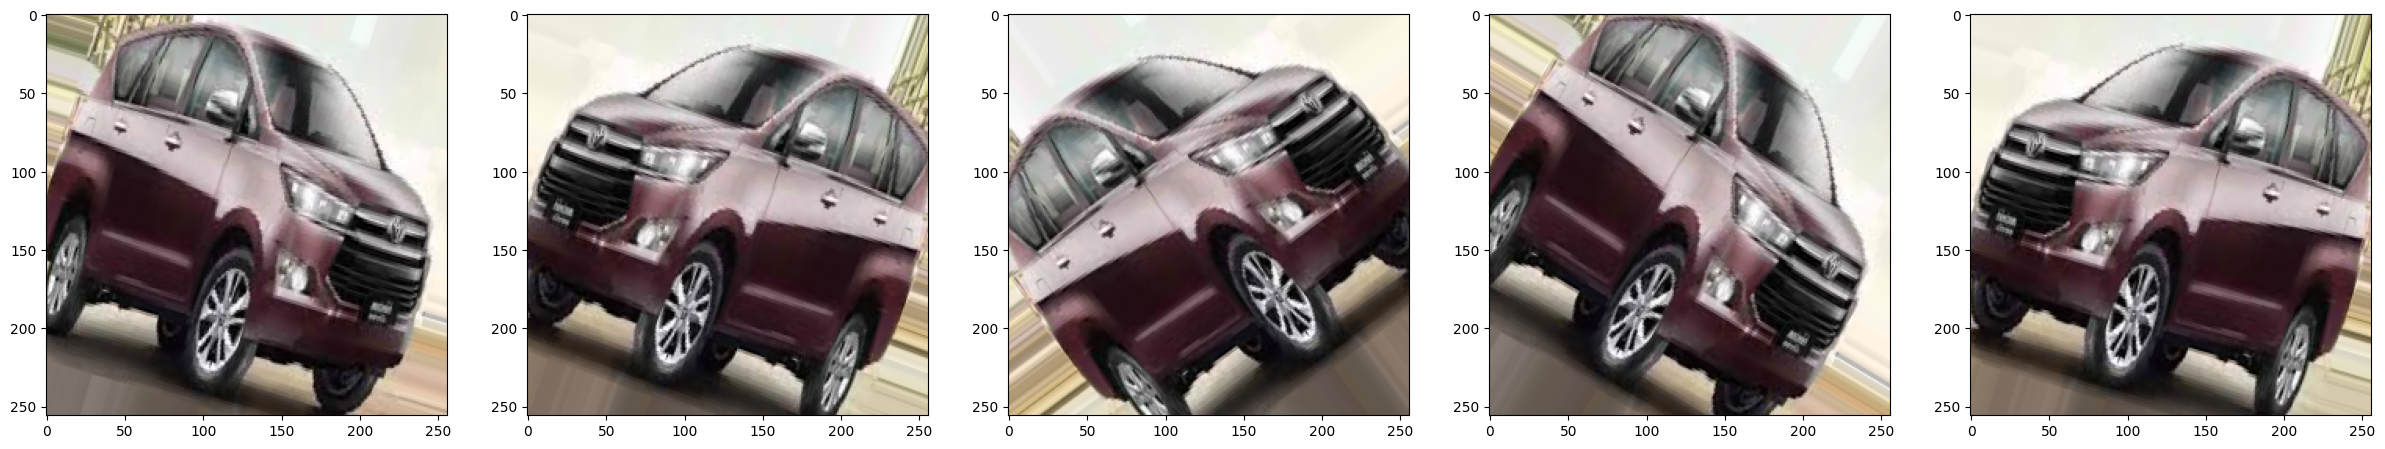

In [34]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

In [35]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (224, 224),
                          							batch_size = 64,
                                                    class_mode ='sparse')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  batch_size = 64,
                                                  class_mode="sparse")

Found 3352 images belonging to 7 classes.
Found 813 images belonging to 7 classes.


(64, 224, 224, 3)
[1. 0. 4. 3. 5. 5. 6. 1. 0. 0. 6. 0. 4. 3. 5. 6. 2. 0. 0. 6. 0. 0. 0. 0.
 0. 0. 6. 0. 5. 5. 6. 2. 5. 5. 3. 1. 0. 0. 4. 2. 0. 4. 6. 0. 0. 2. 6. 6.
 6. 0. 2. 0. 6. 6. 1. 3. 6. 3. 6. 0. 5. 3. 1. 6.]


<Figure size 640x480 with 0 Axes>

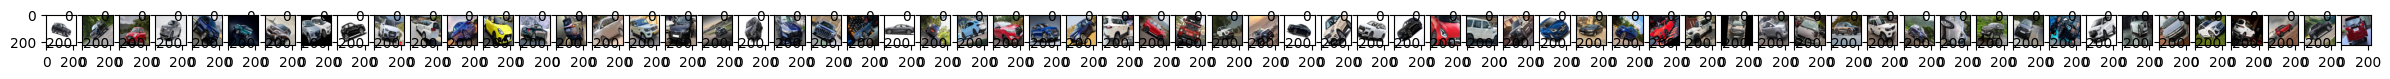

In [36]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

# Modelo 2

In [37]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False ## Not trainable weights

model = Sequential()

model.add(base_model)
model.add(layers.Convolution2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Convolution2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(units=96, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=7, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 32)          147488    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 96)               

In [39]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [40]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs = 20)

Epoch 1/20
53/53 [==============================] - 870s 17s/step - loss: 1.7701 - acc: 0.3186 - val_loss: 1.4563 - val_acc: 0.5031
Epoch 2/20
53/53 [==============================] - 64s 1s/step - loss: 1.3336 - acc: 0.5301 - val_loss: 0.9350 - val_acc: 0.6740
Epoch 3/20
53/53 [==============================] - 62s 1s/step - loss: 1.0078 - acc: 0.6471 - val_loss: 0.6936 - val_acc: 0.7528
Epoch 4/20
53/53 [==============================] - 62s 1s/step - loss: 0.8111 - acc: 0.7220 - val_loss: 0.5111 - val_acc: 0.8524
Epoch 5/20
53/53 [==============================] - 63s 1s/step - loss: 0.6782 - acc: 0.7676 - val_loss: 0.4678 - val_acc: 0.8438
Epoch 6/20
53/53 [==============================] - 63s 1s/step - loss: 0.6100 - acc: 0.7921 - val_loss: 0.5766 - val_acc: 0.8155
Epoch 7/20
53/53 [==============================] - 62s 1s/step - loss: 0.5401 - acc: 0.8177 - val_loss: 0.4114 - val_acc: 0.8659
Epoch 8/20
53/53 [==============================] - 62s 1s/step - loss: 0.4918 - acc: 0.

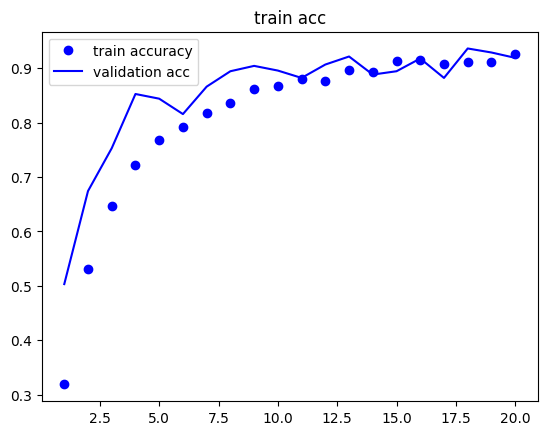

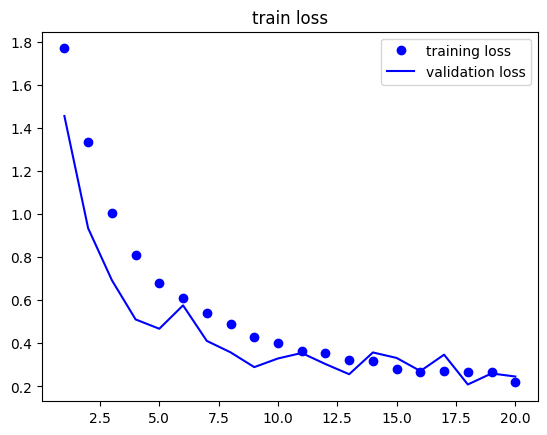

In [44]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)


plt.plot(epochs, acc,'bo',label='train accuracy')
plt.plot(epochs, val_acc,'b',label='validation acc')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('train loss')
plt.legend()

plt.show()

In [45]:
model.save("model2.h5")

In [46]:
test_loss, test_acc = model.evaluate(test_generator, steps = 4)
print('\ntest acc :\n', test_acc)
print('\ntest loss :\n', test_loss)

4/4 [==============================] - 7s 1s/step - loss: 0.2080 - acc: 0.9258

test acc :
 0.92578125

test loss :
 0.2079908549785614
